In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import matplotlib.mlab as mlab

from decimal import Decimal



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [212]:
Iona = (-123.30898284912109, 49.187351226806641)
S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)
xl=(-126.2-0.2,-122.2 + 0.2)
yl=(47.1 - 0.2 , 51 + 0.2)

x0 = xl [0] + 1 
x1 = xl[1] - 1
y0 = yl [0] - 1
y1 = yl [1] + 1
lower_left = (xl[0], yl[0])

In [3]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')


#RUN parameters


basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2/2016+jan2017/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"

filesdir = "/ocean/gsgarbi/selected_days/"

In [4]:
def lin_equ(l1,l2):
    #line encoded as l=(x,y)
    if l2[0] == l1[0]:
        m = 0
        return m, l2[1]-(m*l2[0])
    m=((l2[1]-l1[1]))/(l2[0]-l1[0])
    c=(l2[1]-(m*l2[0]))
    return float(m), float(c)

<b> Load year 2016 </b>

In [5]:
def create_array(filesdir, nday):
    
    dirs = os.listdir(filesdir)

    dirs = sorted(dirs)
    
    pts = []

    for i in dirs:
        
        if "{}d.npy".format (nday) == i [18:] and "2016" == i [:4]: #select length

            array = np.load(open(filesdir + i, 'rb'))

            pts.append(array)

    pts = np.array([i for sublist in pts for i in sublist])

    
    return pts

In [6]:
# areas_test = {"a1": [-200, 200, 49.1, 49.35]}

def get_coefs():


    points = {'alltop': [[x0, 51], [x0, 51]],
              'NB': [[x0,50.4], [-124.5, y1]],
                'N1': [[x0, 48], [-123.5, 50]],
                'N0': [[x0, Iona[0]], [x1, Iona[1]]],    
                    'S0': [[x0, 48.8], [x0, 48.8]],
                         'JF': [[x0, 46], [x0, 46]]
             }

    coefs = {}

    names = list(points.keys())

    for region in points.keys():
        coefs [region] = lin_equ(points[region][0], points[region][1])

   
    
    return coefs


In [206]:
def param(timef): #background
    
    size = 5
    ms = 5
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214) 
    bathy = nc.Dataset("/ocean/gsgarbi/bathy_meter_SalishSea2.nc")
    model_lats = bathy.variables['nav_lat'][:]
    model_lons = bathy.variables['nav_lon'][:]
    depth = bathy.variables['Bathymetry'][:]        
    #End of spit
    late = 49.205
    lone = -123.26
    #Further up spit
    lats = 49.214
    lons = -123.22
        
    dx = 1.2
    lat = late + dx * (late - lats)
    lon = lone + dx * (lone - lons)
    y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)

    outy = y - 1
    outx = x - 1
    
    deep = 110
    shallow = 35
    
    time_0 = 0
    
    time_f = 2
    
    new_limx = xl
    
    new_limy = yl

    
    new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])
    
    new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                       
    
    Iona =(model_lons[outy, outx], model_lats[outy, outx])
    
    
    
    #norm_p = mpl_colors.Normalize(vmin=deep, vmax=shallow)
    
    norm_w = None
    cmap_w = "winter_r"
    
    norm_p = mpl_colors.Normalize(vmin=time_0, vmax=timef*24)
    cmap_p = plt.cm.plasma_r
      

    
   

        
    global fig, axs
    
    fig, axs = plt.subplots(LIN,COL, figsize = (5,8))

    
    if LIN == 1 or COL == 1:
        
        axs=np.reshape(axs,(1,1))
    
    
    
    for j in range(LIN):
        for k in range (COL):
            
            divider = make_axes_locatable(axs[j,k])
            
            cax_w = divider.append_axes("right", size="5%", pad=0.05)
            

            
            
            cb_w = mpl.colorbar.ColorbarBase(cax_w, 
                                             cmap = mpl.cm.get_cmap('winter_r'),
                                             norm = mpl.colors.Normalize(vmin=shallow, 
                                                                         vmax=deep),
                                             orientation='vertical')

            
         
            
            
            
            
            
            cb_w.set_label("Water depth (m)")
            

    
    
    
    
            mesh_w = axs[j,k].pcolormesh(model_lons, model_lats, depth, cmap=cmap_w)
    

            
    
            axs[j,k].set_xlim(new_limx)
            axs[j,k].set_xticks(new_ticksx)
            axs[j,k].set_xticklabels(('%s W' %-new_limx[0], 
                                      '%s W' %-round(float(sum(new_limx))/2,2), 
                                      '%s W' %-new_limx[1]))
            axs[j,k].set_xlabel('Longitude')
            
            axs[j,k].set_ylim(new_limy)
            axs[j,k].set_yticks(new_ticksy)
            axs[j,k].set_yticklabels(('%s N' %new_limy[0], 
                                      '%s N' %round(float(sum(new_limy))/2,1), 
                                      '%s N' %new_limy[1]))
            axs[j,k].set_ylabel('Latitude')
            
            
            #Iona
            axs[j,k].plot(Iona[0], Iona[1], 'wo', ms = ms)
            #New Stations
    

            
            axs[j,k].annotate(
            "Iona outfall",
            xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(5, 10),
            textcoords='offset points', ha='left', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            

            

            axs[0,0].set_xlim(xl)
            axs[0,0].set_ylim(yl)
        
        
    

    return axs

    


In [165]:
LIN = 1
COL = 1
points = {'alltop': [[x0, 51], [x0, 51]],
          'NB': [[x0,50.4], [-124.5, y1]],
            'N1': [[x0, 48], [-123.5, 50]],
            'N0': [[x0, Iona[0]], [x1, Iona[1]]],    
                'S0': [[x0, 48.8], [x0, 48.8]],
                     'JF': [[x0, 46], [x0, 46]]}

pointsd = {
          'NB': [[x0,50.4], [-124.5, y1]],
            'N1': [[x0, 48], [-123.5, 50]],
            'N0': [[x0, Iona[1]], [Iona[0], Iona[1]]],    
                'S0': [[x0, 48.8], [x0+1, 48.8+1]],
                     'JF': [[x0+1, 47.5], [x0, 49.5]]}

[-126.2        -126.18282828 -126.16565657 -126.14848485 -126.13131313
 -126.11414141 -126.0969697  -126.07979798 -126.06262626 -126.04545455
 -126.02828283 -126.01111111 -125.99393939 -125.97676768 -125.95959596
 -125.94242424 -125.92525253 -125.90808081 -125.89090909 -125.87373737
 -125.85656566 -125.83939394 -125.82222222 -125.80505051 -125.78787879
 -125.77070707 -125.75353535 -125.73636364 -125.71919192 -125.7020202
 -125.68484848 -125.66767677 -125.65050505 -125.63333333 -125.61616162
 -125.5989899  -125.58181818 -125.56464646 -125.54747475 -125.53030303
 -125.51313131 -125.4959596  -125.47878788 -125.46161616 -125.44444444
 -125.42727273 -125.41010101 -125.39292929 -125.37575758 -125.35858586
 -125.34141414 -125.32424242 -125.30707071 -125.28989899 -125.27272727
 -125.25555556 -125.23838384 -125.22121212 -125.2040404  -125.18686869
 -125.16969697 -125.15252525 -125.13535354 -125.11818182 -125.1010101
 -125.08383838 -125.06666667 -125.04949495 -125.03232323 -125.01515152
 -124.99

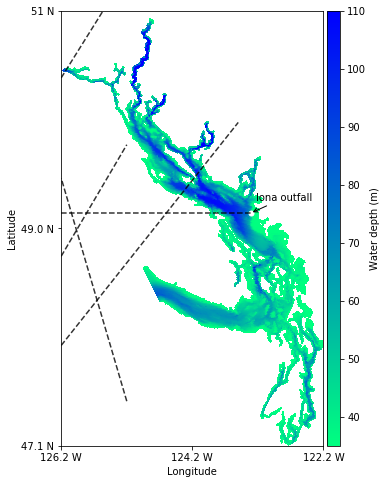

In [166]:
axs2 = param(10)


for region in pointsd.values():
    
    if region[0][1] == region[1][1]:
        print ('equal')
    y= np.linspace(region[0][1],region[1][1],100)
    x= np.linspace(region[0][0],region[1][0],100)
    
    print (x)

    axs2[0,0].plot(x, y, '--', ms= 20, color = 'black', alpha = 0.8)

    


plt.show()

[-126.7        -126.65454545 -126.60909091 -126.56363636 -126.51818182
 -126.47272727 -126.42727273 -126.38181818 -126.33636364 -126.29090909
 -126.24545455 -126.2        -126.15454545 -126.10909091 -126.06363636
 -126.01818182 -125.97272727 -125.92727273 -125.88181818 -125.83636364
 -125.79090909 -125.74545455 -125.7        -125.65454545 -125.60909091
 -125.56363636 -125.51818182 -125.47272727 -125.42727273 -125.38181818
 -125.33636364 -125.29090909 -125.24545455 -125.2        -125.15454545
 -125.10909091 -125.06363636 -125.01818182 -124.97272727 -124.92727273
 -124.88181818 -124.83636364 -124.79090909 -124.74545455 -124.7
 -124.65454545 -124.60909091 -124.56363636 -124.51818182 -124.47272727
 -124.42727273 -124.38181818 -124.33636364 -124.29090909 -124.24545455
 -124.2        -124.15454545 -124.10909091 -124.06363636 -124.01818182
 -123.97272727 -123.92727273 -123.88181818 -123.83636364 -123.79090909
 -123.74545455 -123.7        -123.65454545 -123.60909091 -123.56363636
 -123.5181818

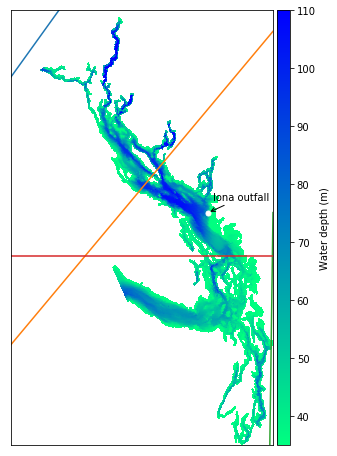

In [201]:
axs2 = param(10)
c = get_coefs()

xlims = {'NB':(-126,-125), 'N1': (-123, -125)}
xlims2 = {}


for region in points.keys():
    if region == 'alltop':
        continue

    x = np.linspace(x0,x1,100)
    print (x)
    m,n = c[region]

    y = m*x + n
    
    print ('regio,x,y: {}{}{}'.format(region,x,y))
    axs[0,0].plot(x, y, '-')
axs[0,0].get_xaxis().set_visible(False)
axs[0,0].get_yaxis().set_visible(False)
plt.show()

Questions for Elise:
1. why was the problem only happening for a few values of nday, but the code was working for all the othervalues?
2. how do I show a pdf file that is in version control?
3. 

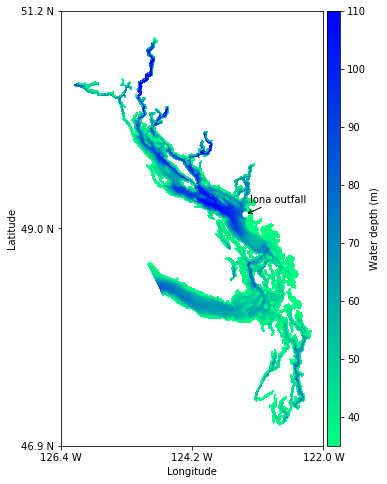

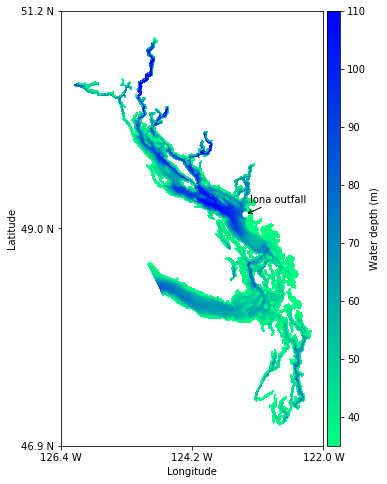

In [216]:
axs2 = param(10)
plt.savefig('/ocean/gsgarbi/sep_plots.png', transparent = True)

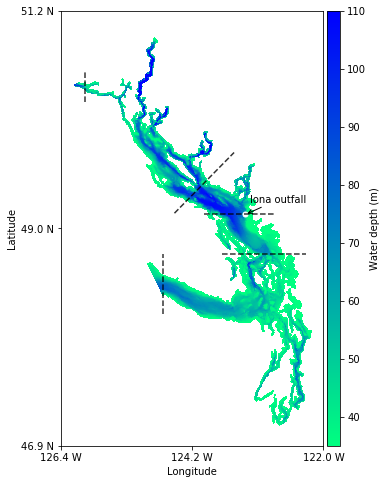

In [235]:
axs2 = param(10)

xlims = ([-126, -126], [-124.5, -123.5], [Iona[0]-0.7, Iona[0]+0.5], 
         [-123.7, -122.3],[-124.7, -124.7] )


ylims = ([50.3,50.6], [49.2, 49.8], [Iona[1], Iona[1]], [48.8, 48.8], [48.2, 48.8])

for x, y in zip (xlims, ylims):

    a = np.linspace(x[0], x[1], 100)
    b = np.linspace(y[0], y[1], 100)

    axs2[0,0].plot(a,b, '--', color = 'black', alpha = 0.8)
plt.savefig('/ocean/gsgarbi/sep_plots.png', transparent = True)